In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
game = pd.read_csv("Game.csv")

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\IPython\core\interactiveshell.py:3427: DtypeWarning: Columns (58,64,65,68,79,93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
game.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,...,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
0,24600001,21946,1610610035,HUS,Toronto Huskies,1946-11-01,HUS vs. NYK,L,0,25.0,...,NaN,NaN,3.0,3.0,Tied,0.0,0.0,0.0,0.0,1.0
1,24600003,21946,1610610034,BOM,St. Louis Bombers,1946-11-02,BOM vs. PIT,W,0,20.0,...,NaN,NaN,5.0,1.0,St. Louis,0.0,0.0,0.0,0.0,1.0
2,24600004,21946,1610610025,CHS,Chicago Stags,1946-11-02,CHS vs. NYK,W,0,21.0,...,NaN,NaN,3.0,3.0,Tied,0.0,0.0,0.0,0.0,1.0
3,24600002,21946,1610610032,PRO,Providence Steamrollers,1946-11-02,PRO vs. BOS,W,0,21.0,...,NaN,NaN,5.0,1.0,Providence,0.0,0.0,0.0,0.0,1.0
4,24600005,21946,1610610028,DEF,Detroit Falcons,1946-11-02,DEF vs. WAS,L,0,10.0,...,NaN,NaN,1.0,5.0,Washington,0.0,0.0,0.0,0.0,1.0


PROBLEM STATEMENT:  Predict whether home team will win or loose the match based on the attributes provided


Fields like GAME_ID,SEASON_ID,GAME_DATE,VIDEO_AVAILABLE_HOME,VIDEO_AVAILABLE_AWAY, GAME_DATE_EST, GAME_SEQUENCE,GAME_STATUS_ID, GAME_STATUS_TEXT,GAMECODE, SEASON ( this does not impact the game, but helps us to understand the trends in teams game each year, since we are not designing a time-series model here I am droping this column as well), LIVE_PERIOD, LIVE_PC_TIME, NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST, WH_STATUS, GAME_DATE_DAY, GAME_TIME, LAST_GAME_ID, LAST_GAME_DATE_EST, LAST_GAME_HOME_TEAM_ID, LAST_GAME_HOME_TEAM_CITY, VIDEO_AVAILABLE_FLAG, HUSTLE_STATUS, HISTORICAL_STATUS donot impact the game. hence adding these columns to drop_columns list

In [4]:
drop_columns = ['GAME_ID','SEASON_ID','GAME_DATE','VIDEO_AVAILABLE_HOME','VIDEO_AVAILABLE_AWAY','GAME_DATE_EST',
                'GAME_SEQUENCE','GAME_STATUS_ID','GAME_STATUS_TEXT','GAMECODE','SEASON','LIVE_PERIOD','LIVE_PC_TIME',
                'NATL_TV_BROADCASTER_ABBREVIATION','LIVE_PERIOD_TIME_BCAST','WH_STATUS','GAME_DATE_DAY','GAME_TIME','LAST_GAME_ID',
                'LAST_GAME_DATE_EST','LAST_GAME_HOME_TEAM_ID','LAST_GAME_HOME_TEAM_CITY','VIDEO_AVAILABLE_FLAG','HUSTLE_STATUS','HISTORICAL_STATUS']

WL_HOME,WL_AWAY,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER all these fields indicate who wins the match. hence I am choosing only the WL_HOME. which Identifies who wins th match. adding the other columns to drop_columns

In [5]:
drop_columns.extend(['WL_AWAY','HOME_TEAM_WINS','HOME_TEAM_LOSSES','SERIES_LEADER'])

columns TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME are redudant and hence retaining only TEAM_ABBREVIATION_HOME, similarly TEAM_ID_AWAY, TEAM_ABBREVIATION_AWAY, TEAM_NAME_AWAY are redudant retaining only TEAM_ABBREVIATION_AWAY

MATCHUP_HOME,MATCHUP_AWAY are redudant and moreover we can identify this details from home team and away team name so adding these columns to drop_columns

In [6]:
drop_columns.extend(['TEAM_ID_HOME','TEAM_NAME_HOME','TEAM_ID_AWAY','TEAM_NAME_AWAY','MATCHUP_HOME','MATCHUP_AWAY'])

the function empty_columns is provided to check if the column has huge number of missing data and remove it. Since the central tendencies dont seem to describe the data well if there are two many NaN values and filling an arbitrary value for too many records will impact the output. we are removing the column that has is sparse .



In [7]:
def empty_columns(data,drop_columns=[]):
    """This method checks if the number of missing data in a column in greater than half the size of the dataset.
  if yes the column is added to the list of columns that needs to be removed.

  Parameters:

    data = The dataset that needs to cleansed
    drop_cols = list of columns to be removed, if already identified, else takes in empty ist by default

  output:

  drop_cols => list of columns to be dropped from that dataset
"""
    columns = data.columns
    for col in columns:
        if data[col].isnull().sum() >= (data.shape[0])/2:
            if col not in drop_columns:
                drop_columns.append(col)
    return drop_columns

In [8]:
drop_cols = empty_columns(game,drop_columns)

In [9]:
len(drop_cols)

78

In [10]:
check_cols = [i for i in drop_columns if i in game.columns]
check_cols == drop_cols # Making sure the column names are specified correctly to avoid errors while dropping the columns

True

In [167]:
game_copy = game.drop(drop_cols,axis = 1)# making a copy of the original dataset so that we can work without disturing the primary data
print(len(game_copy.columns)) # verifying if the columns have been removed

71


In [168]:
game_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TEAM_ABBREVIATION_HOME            62448 non-null  object 
 1   WL_HOME                           62408 non-null  object 
 2   MIN_HOME                          62448 non-null  int64  
 3   FGM_HOME                          62430 non-null  float64
 4   FGA_HOME                          44586 non-null  float64
 5   FG_PCT_HOME                       44548 non-null  float64
 6   FG3M_HOME                         46791 non-null  float64
 7   FG3A_HOME                         41527 non-null  float64
 8   FG3_PCT_HOME                      41142 non-null  float64
 9   FTM_HOME                          62427 non-null  float64
 10  FTA_HOME                          59412 non-null  float64
 11  FT_PCT_HOME                       59409 non-null  float64
 12  OREB

on checking through the listed columns there are still columns which logically donot impact the win or loss like LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_NAME( This could be preserved in case we are going the work on the entire series data as a single batch, since we are going to predict only if the home team wins or looses neglecting this column), LAST_GAME_VISITOR_TEAM_CITY, LAST_GAME_VISITOR_TEAM_ID, LAST_GAME_HOME_TEAM_NAME, LAST_GAME_HOME_TEAM_ABBREVIATION, LAST_GAME_HOME_TEAM_POINTS, TEAM_CITY_NAME_AWAY, TEAM_NICKNAME_AWAY,TEAM_CITY_NAME_HOME, TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME, HOME_TEAM_ID , VISITOR_TEAM_ID 'MIN_HOME','MIN_AWAY','PT_AVAILABLE','PT_XYZ_AVAILABLE'

In [169]:
drop_cols_new=['LAST_GAME_VISITOR_TEAM_CITY1','LAST_GAME_VISITOR_TEAM_NAME','LAST_GAME_VISITOR_TEAM_CITY','LAST_GAME_VISITOR_TEAM_ID',
               'LAST_GAME_HOME_TEAM_NAME','LAST_GAME_HOME_TEAM_ABBREVIATION','LAST_GAME_HOME_TEAM_POINTS', 'TEAM_CITY_NAME_AWAY', 'TEAM_NICKNAME_AWAY','TEAM_CITY_NAME_HOME', 'TEAM_NICKNAME_HOME','TEAM_WINS_LOSSES_HOME', 'HOME_TEAM_ID' , 
               'VISITOR_TEAM_ID','TEAM_WINS_LOSSES_AWAY','LAST_GAME_VISITOR_TEAM_POINTS','MIN_HOME','MIN_AWAY','PT_AVAILABLE','PT_XYZ_AVAILABLE']

In [170]:
game_copy = game_copy.drop(drop_cols_new,axis=1)
game_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TEAM_ABBREVIATION_HOME  62448 non-null  object 
 1   WL_HOME                 62408 non-null  object 
 2   FGM_HOME                62430 non-null  float64
 3   FGA_HOME                44586 non-null  float64
 4   FG_PCT_HOME             44548 non-null  float64
 5   FG3M_HOME               46791 non-null  float64
 6   FG3A_HOME               41527 non-null  float64
 7   FG3_PCT_HOME            41142 non-null  float64
 8   FTM_HOME                62427 non-null  float64
 9   FTA_HOME                59412 non-null  float64
 10  FT_PCT_HOME             59409 non-null  float64
 11  OREB_HOME               41240 non-null  float64
 12  DREB_HOME               41171 non-null  float64
 13  REB_HOME                44340 non-null  float64
 14  AST_HOME                44204 non-null

Splitting the columns into numeric and categorical

In [171]:
categorical_col = []
numeric_col =[]
for col in game_copy.columns:
    if game_copy[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numeric_col.append(col) 
print(f'Total Number of Numeric cols is :{len(numeric_col)}')
print(f'Total Number of Categorical cols is :{len(categorical_col)}')

Total Number of Numeric cols is :48
Total Number of Categorical cols is :3


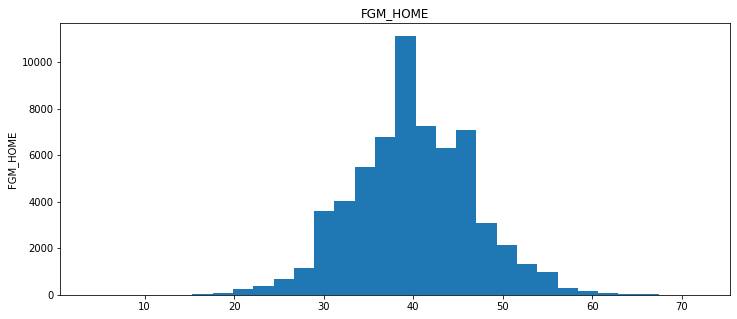

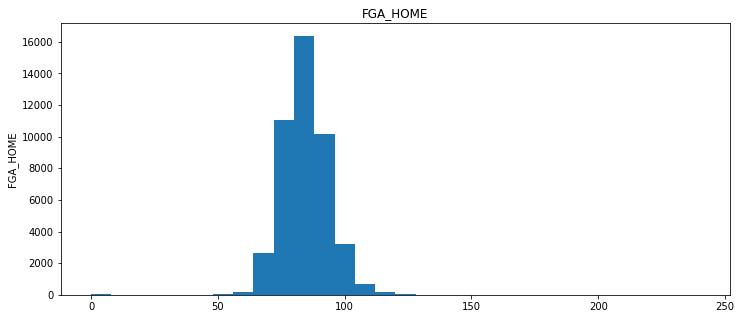

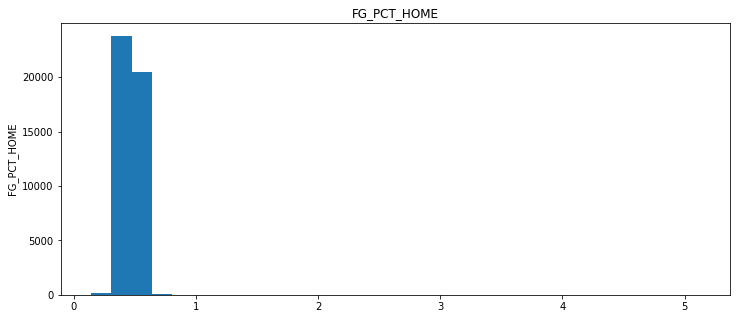

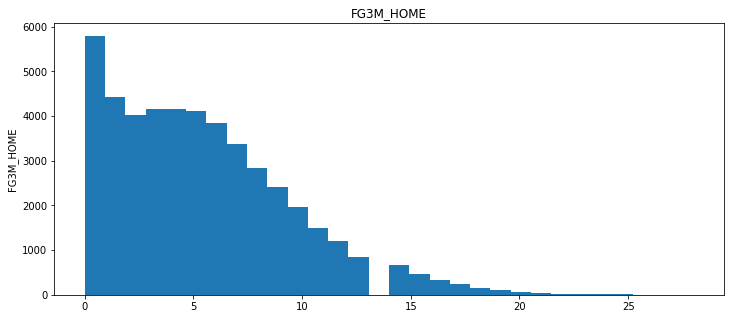

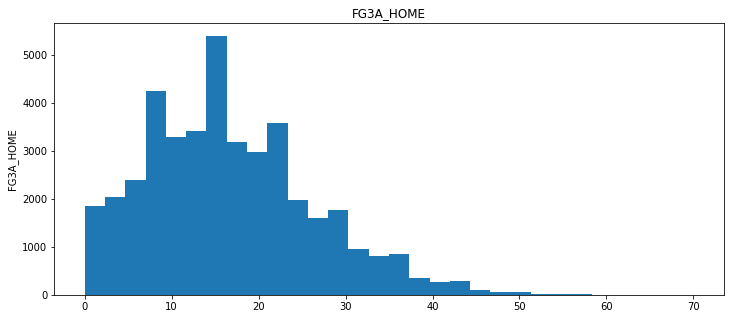

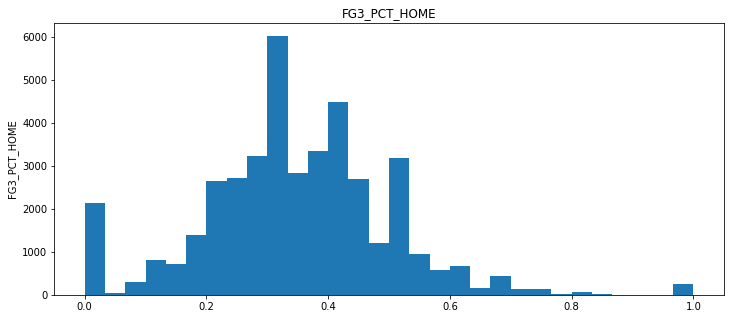

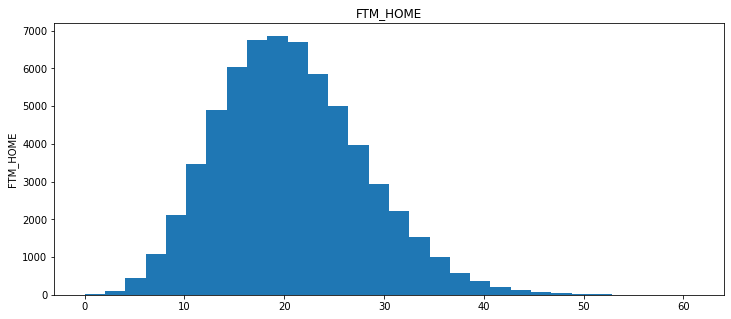

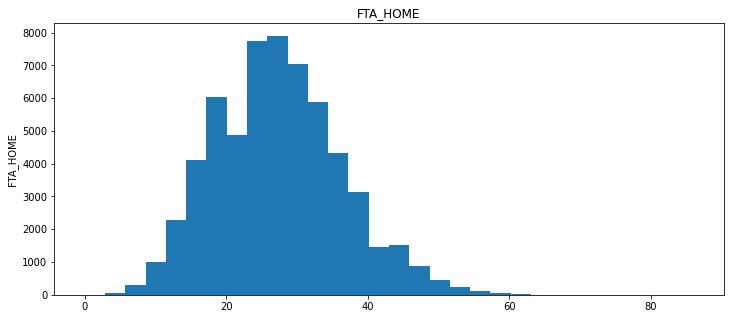

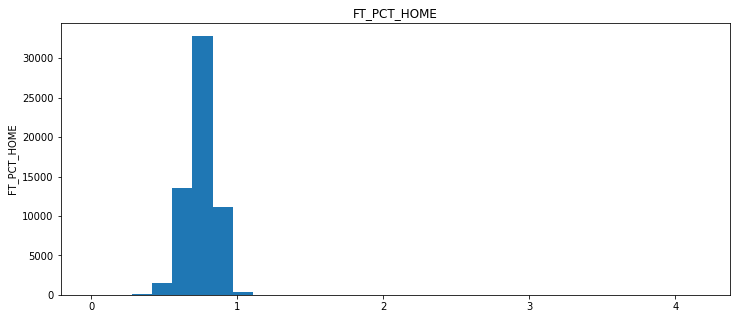

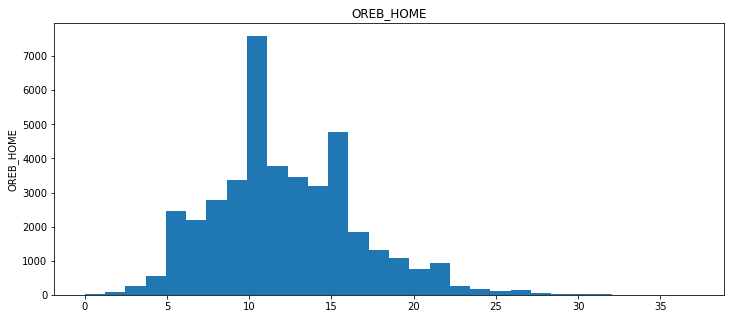

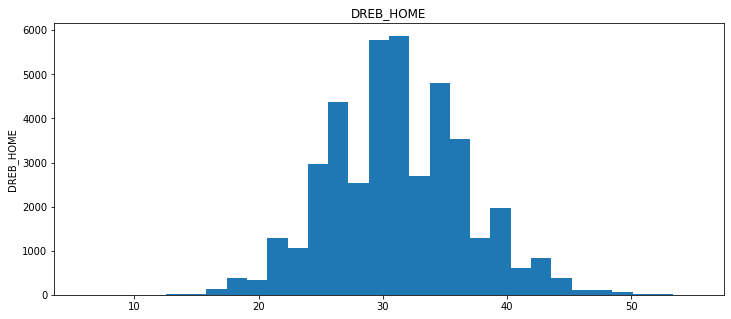

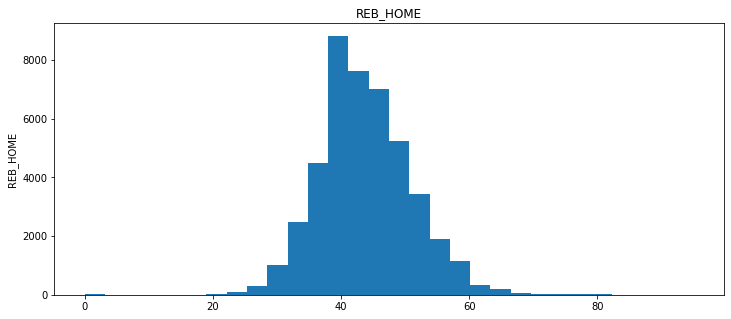

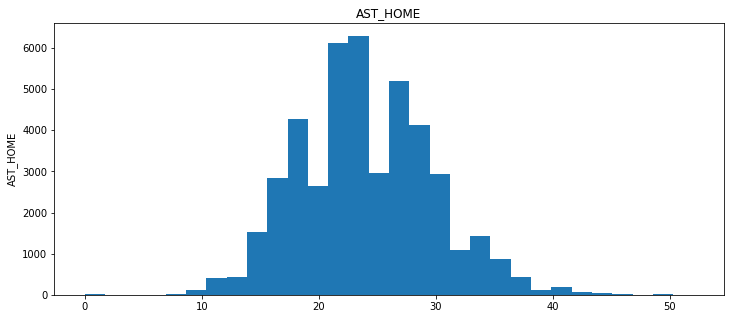

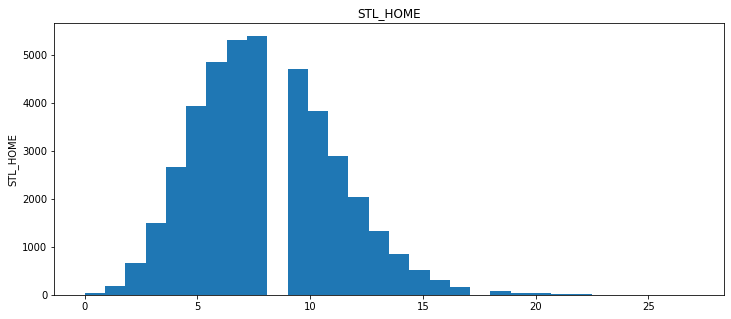

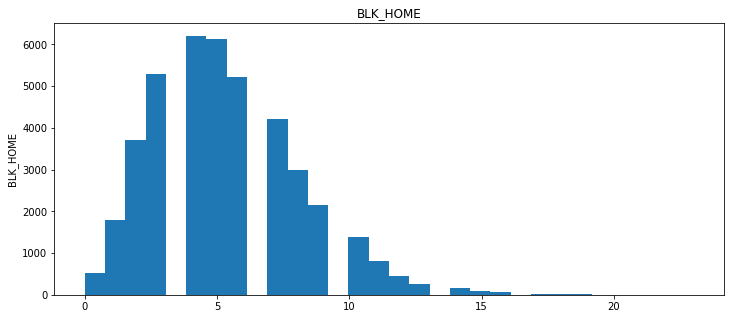

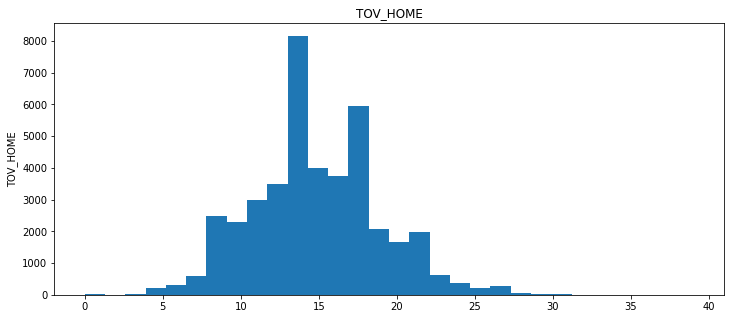

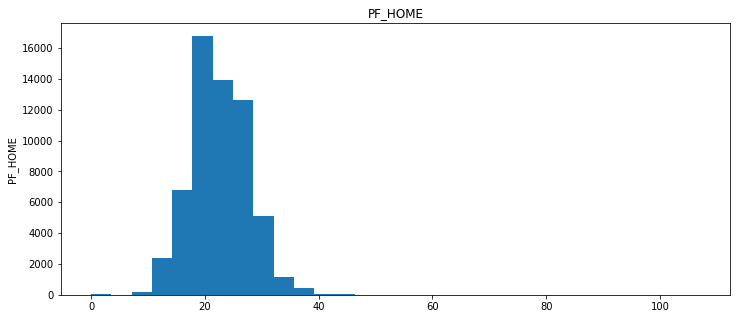

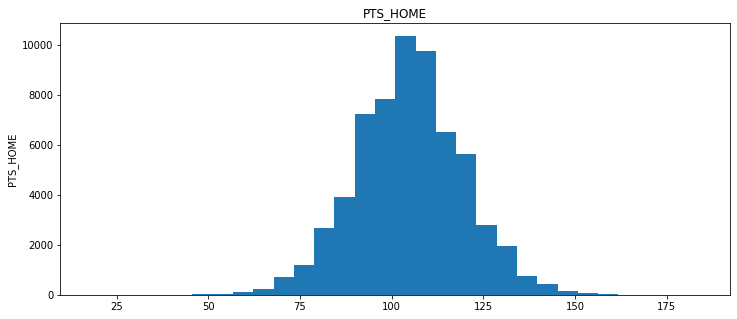

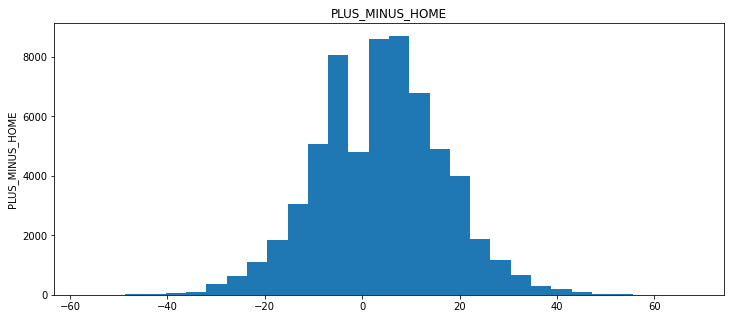

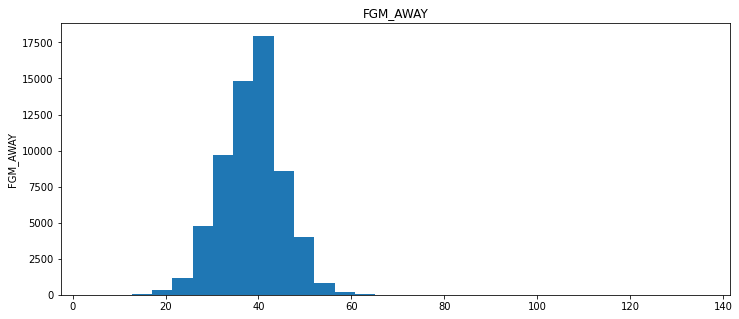

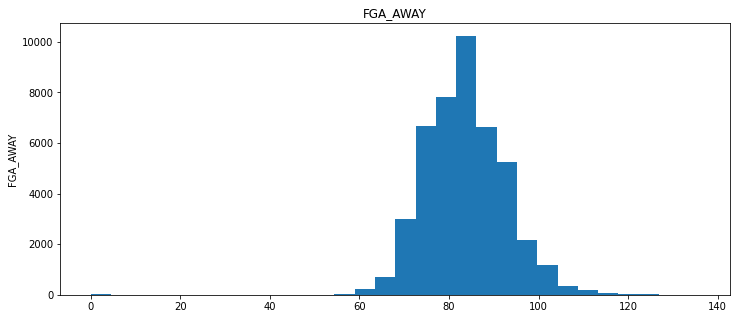

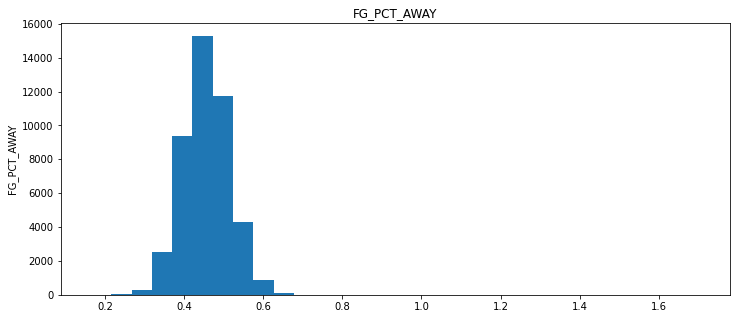

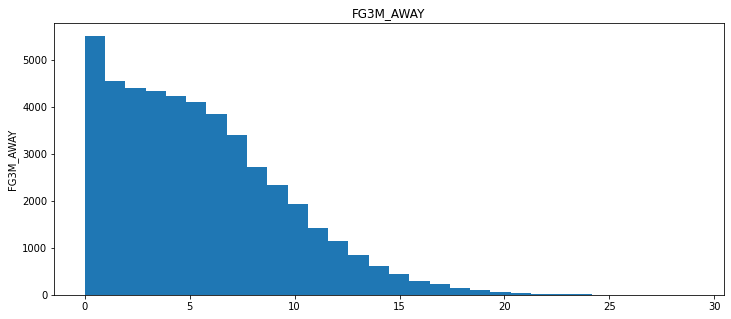

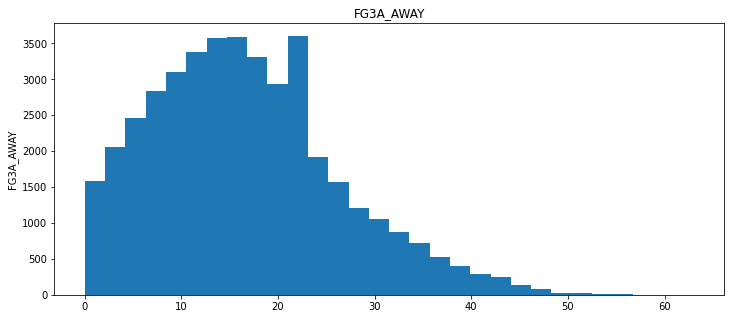

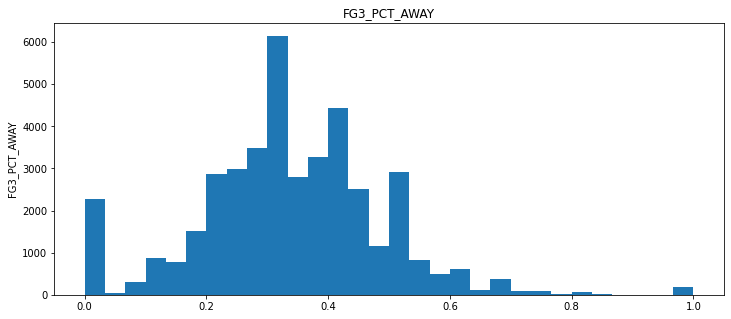

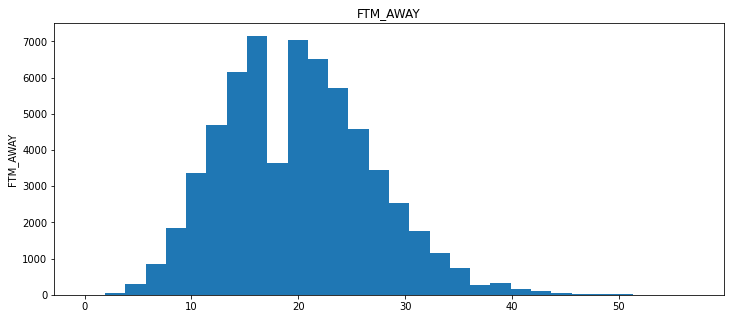

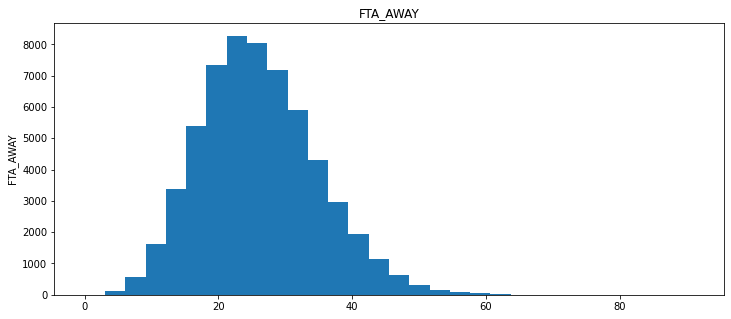

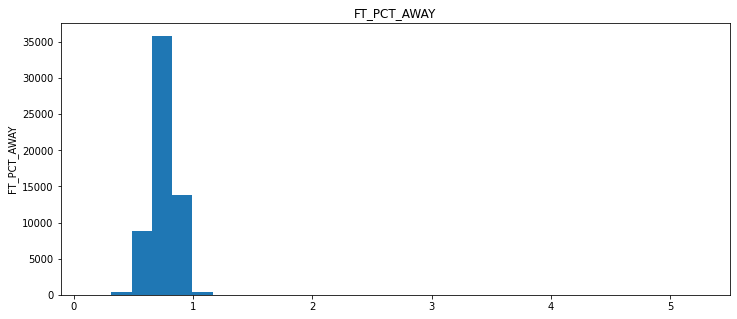

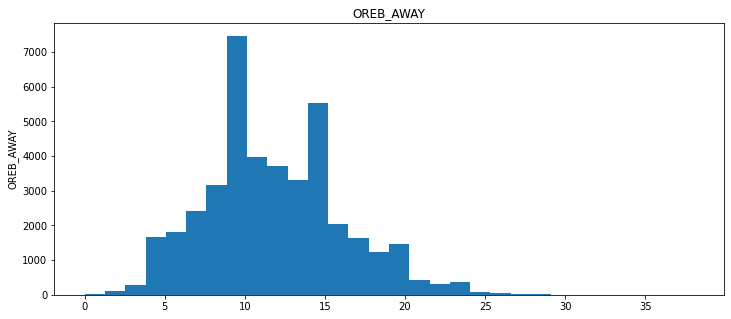

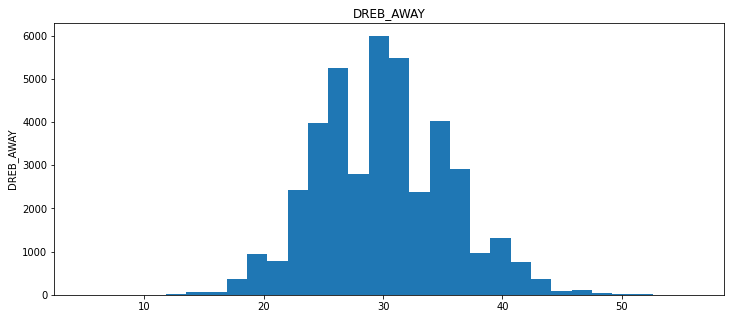

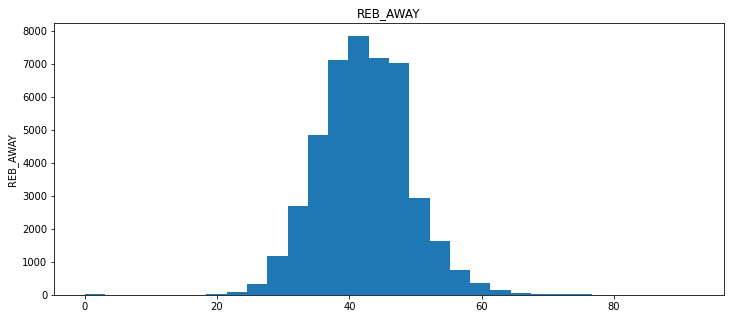

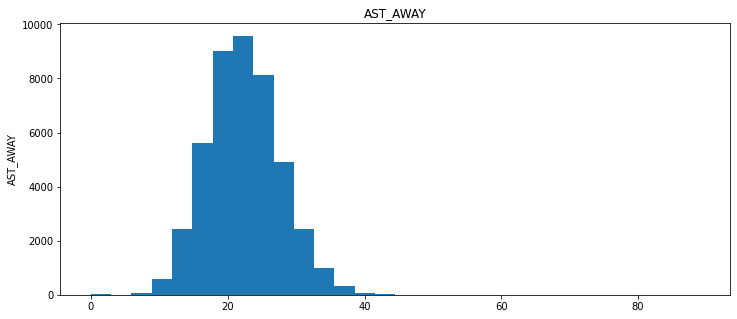

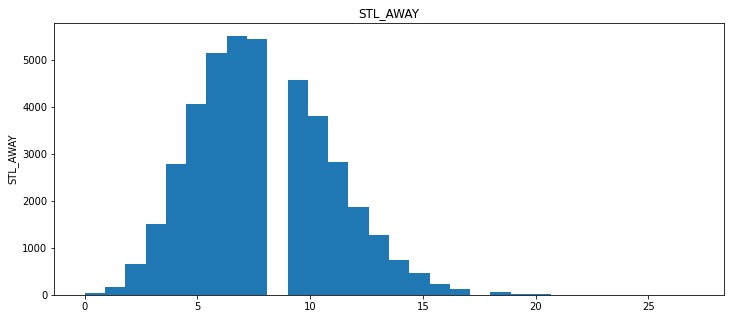

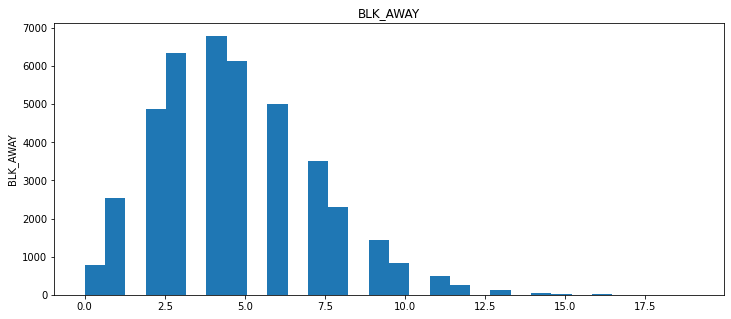

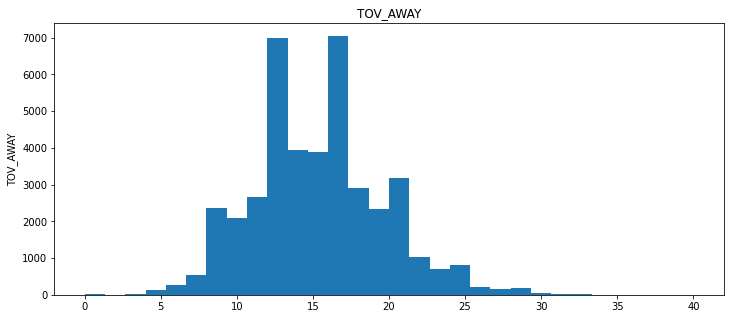

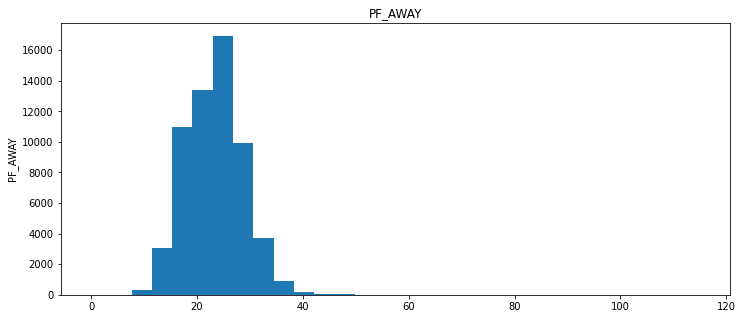

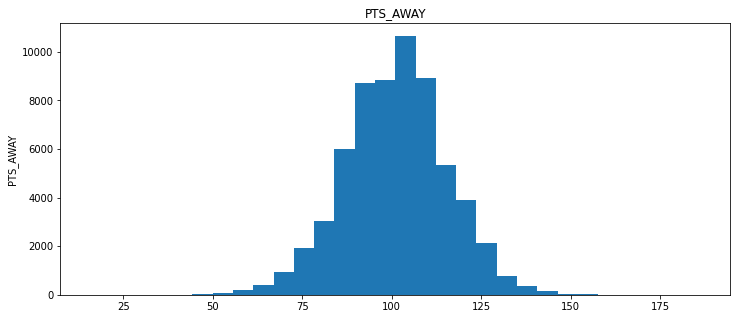

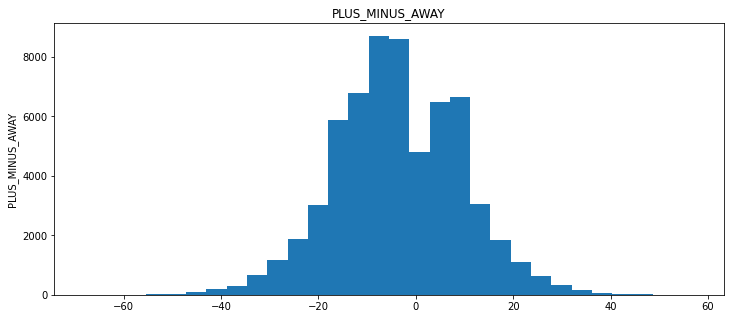

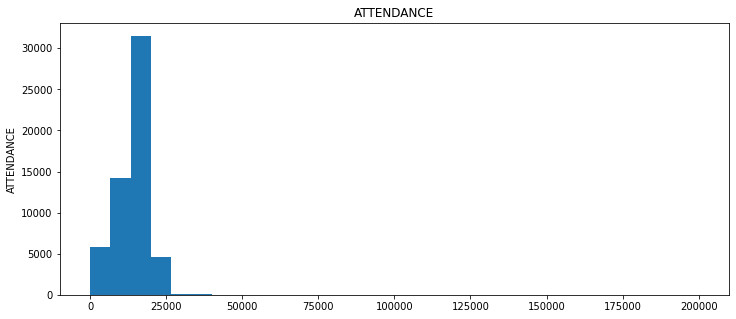

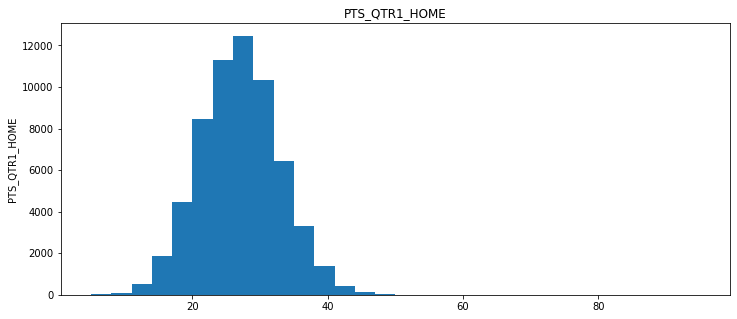

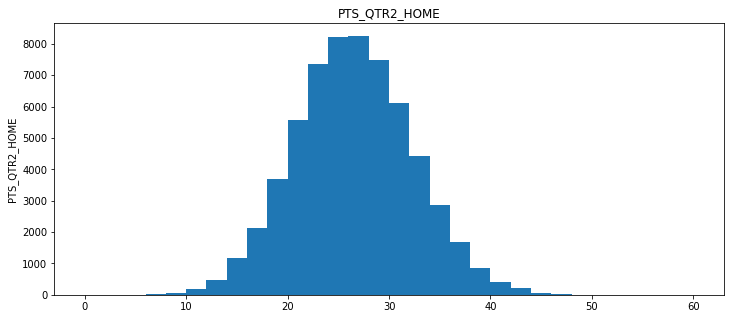

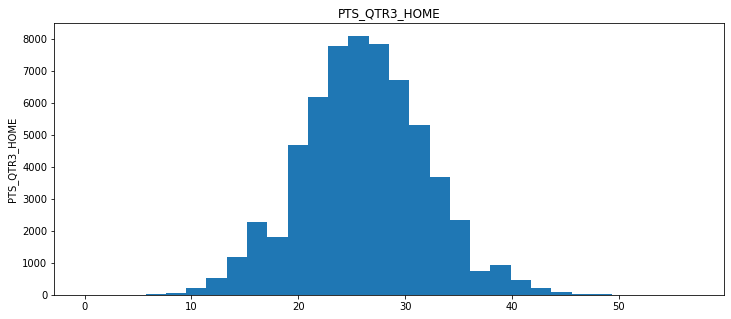

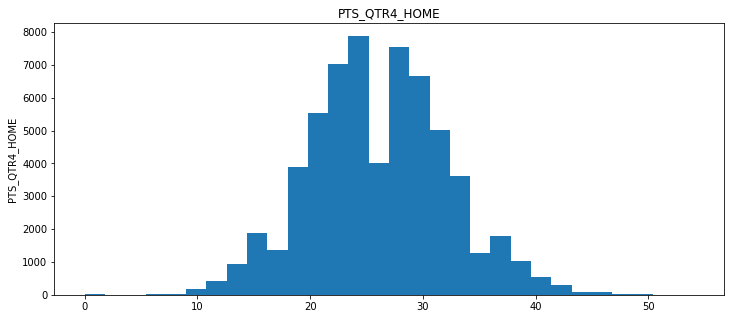

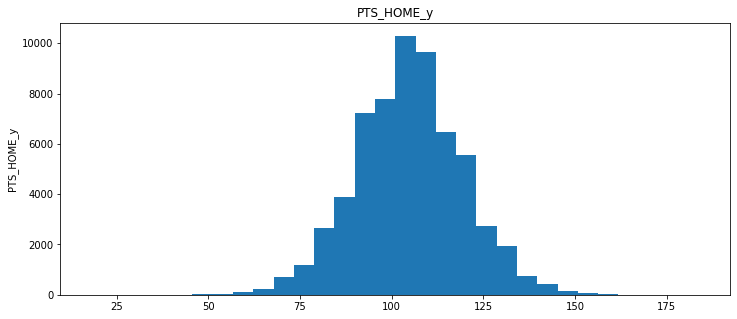

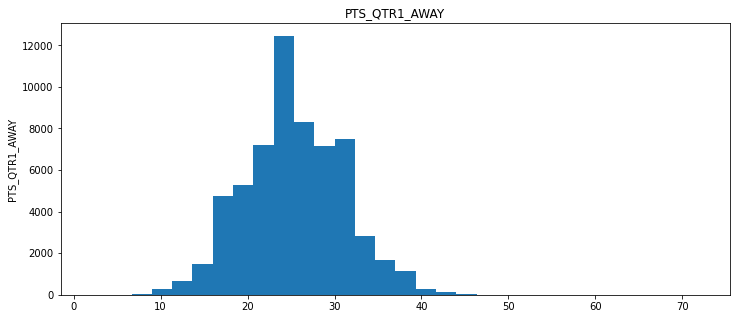

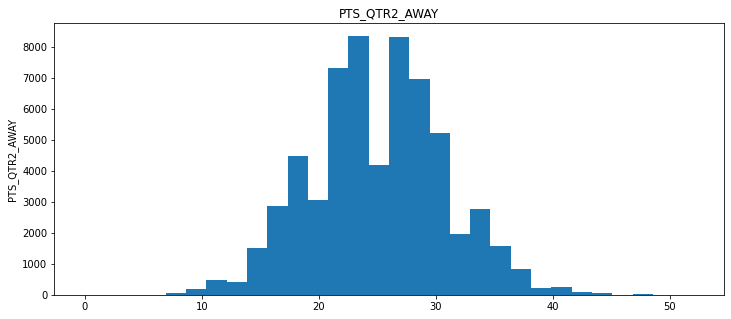

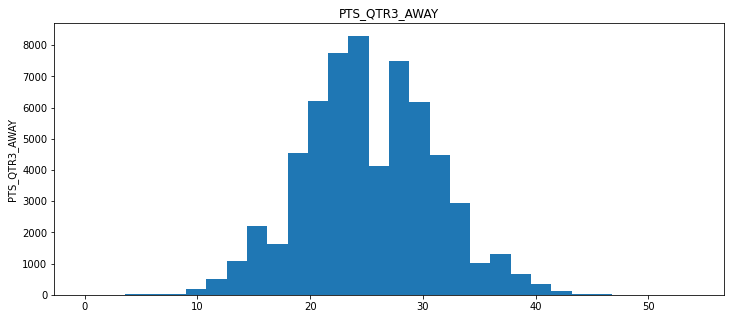

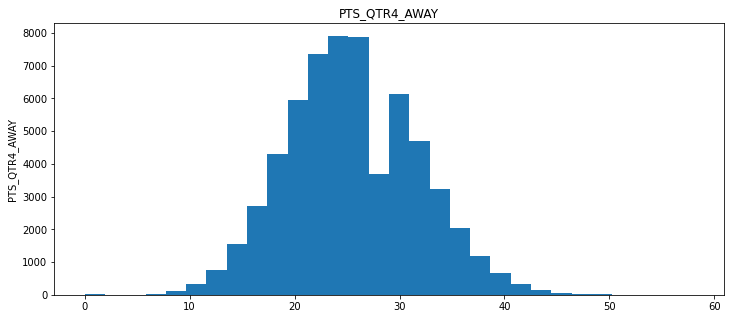

In [20]:
for col in numeric_col:
    plt.figure(figsize=(12,5))
    plt.hist(game_copy[col],bins=30)
    plt.ylabel(col)
    plt.title(col)
    plt.show()

From the above plots we could see that most of the columns is more or less normally distributes except FG3M_HOME,FG3A_HOME,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,BLK_AWAY,

, so lets choose mean to replace NaN values for the columns other than mentioned above and median for the mentioned columns



In [172]:
med = ['FG3M_HOME','FG3A_HOME','FG3M_AWAY','FG3A_AWAY','FG3_PCT_AWAY','BLK_AWAY']

In [173]:
for col in numeric_col:
    if col in med:
        if game_copy[col].isnull().sum() > 0:
            game_copy[col].fillna(game_copy[col].median(),inplace=True)
    elif game_copy[col].isnull().sum() > 0:
        game_copy[col].fillna(game_copy[col].mean(),inplace=True)
    else:
        continue

In [174]:
game_copy[numeric_col].isnull().sum() # checking is the Nan Values have been replaced

FGM_HOME           0
FGA_HOME           0
FG_PCT_HOME        0
FG3M_HOME          0
FG3A_HOME          0
FG3_PCT_HOME       0
FTM_HOME           0
FTA_HOME           0
FT_PCT_HOME        0
OREB_HOME          0
DREB_HOME          0
REB_HOME           0
AST_HOME           0
STL_HOME           0
BLK_HOME           0
TOV_HOME           0
PF_HOME            0
PTS_HOME           0
PLUS_MINUS_HOME    0
FGM_AWAY           0
FGA_AWAY           0
FG_PCT_AWAY        0
FG3M_AWAY          0
FG3A_AWAY          0
FG3_PCT_AWAY       0
FTM_AWAY           0
FTA_AWAY           0
FT_PCT_AWAY        0
OREB_AWAY          0
DREB_AWAY          0
REB_AWAY           0
AST_AWAY           0
STL_AWAY           0
BLK_AWAY           0
TOV_AWAY           0
PF_AWAY            0
PTS_AWAY           0
PLUS_MINUS_AWAY    0
ATTENDANCE         0
PTS_QTR1_HOME      0
PTS_QTR2_HOME      0
PTS_QTR3_HOME      0
PTS_QTR4_HOME      0
PTS_HOME_y         0
PTS_QTR1_AWAY      0
PTS_QTR2_AWAY      0
PTS_QTR3_AWAY      0
PTS_QTR4_AWAY

In [24]:
def plot_outliers(data,cols):
    for col in numeric_col:
        plt.figure()
        sns.boxplot(data[col])
        plt.ylabel(col)
        plt.title(col)
        plt.show()

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


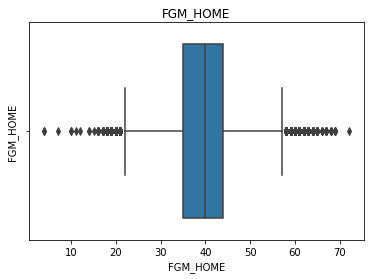

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


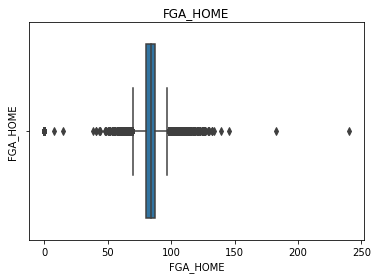

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


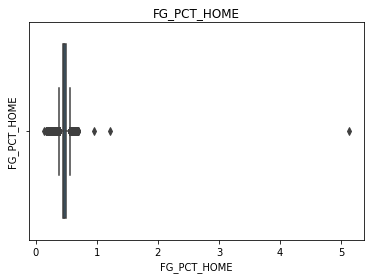

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


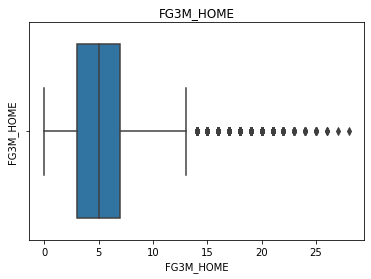

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


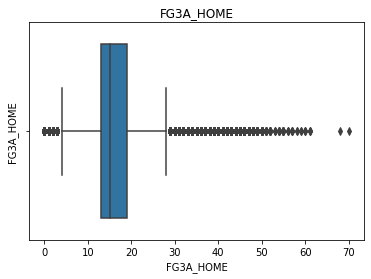

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


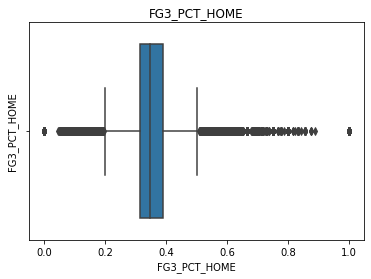

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


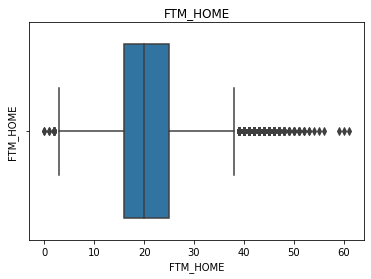

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


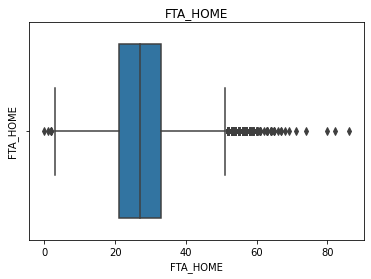

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


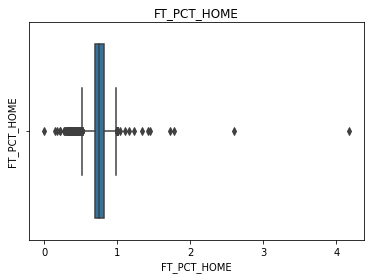

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


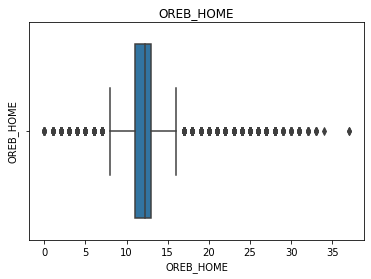

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


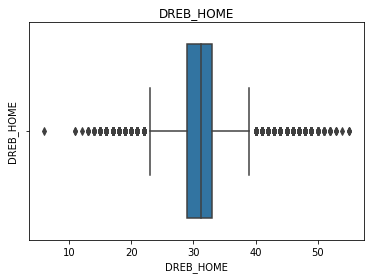

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


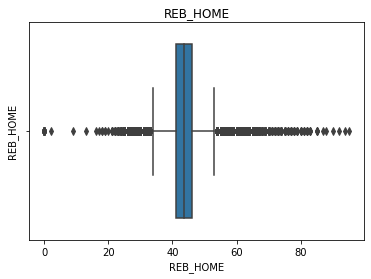

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


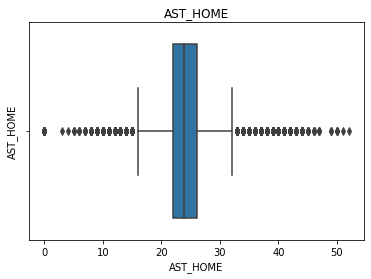

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


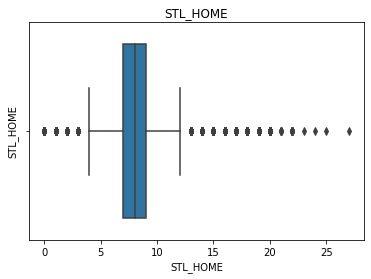

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


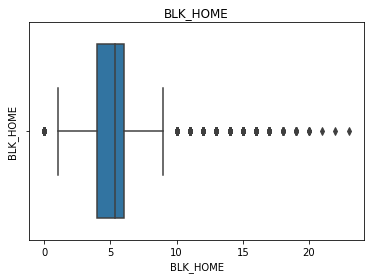

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


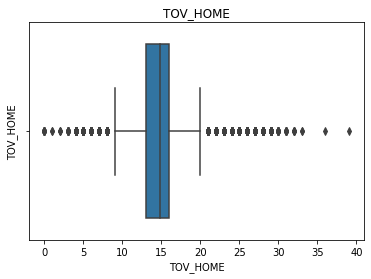

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


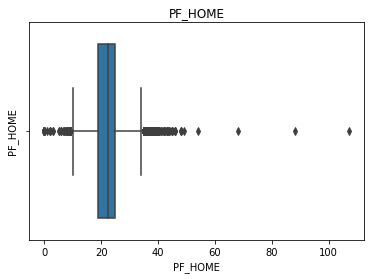

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


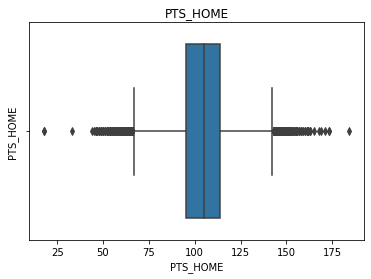

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


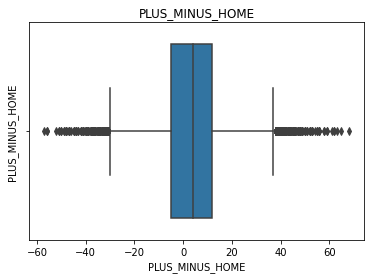

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


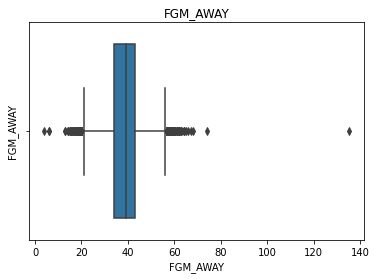

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


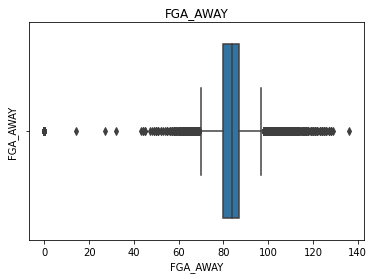

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


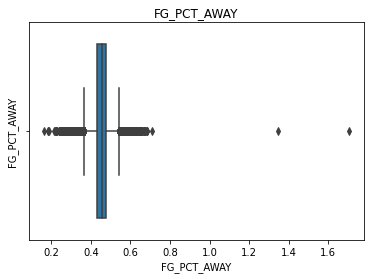

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


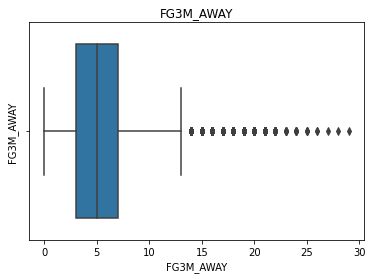

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


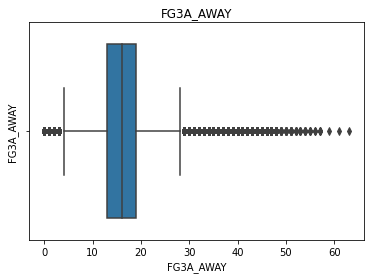

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


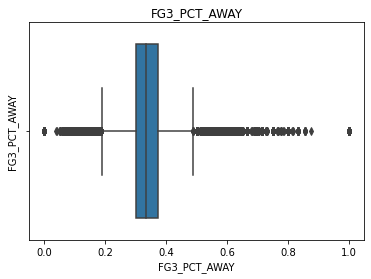

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


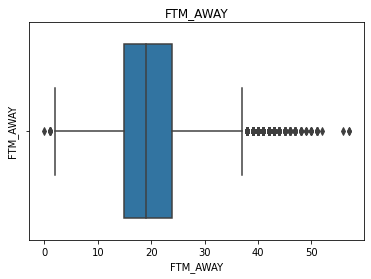

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


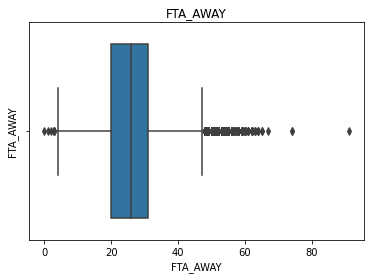

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


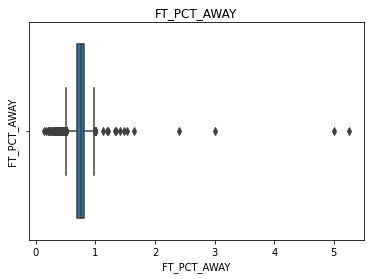

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


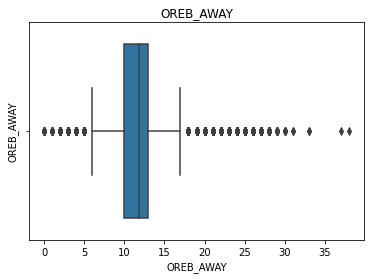

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


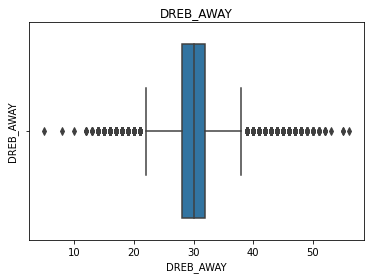

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


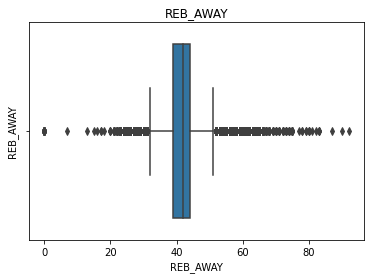

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


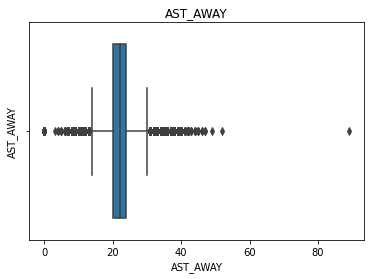

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


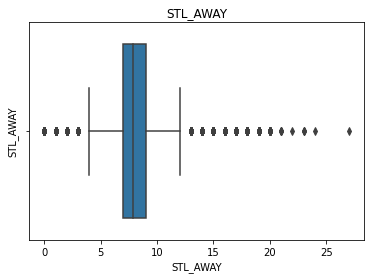

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


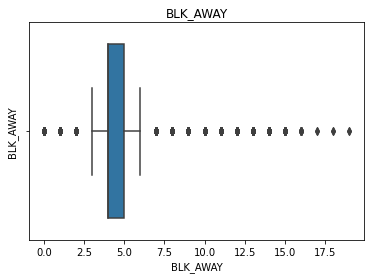

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


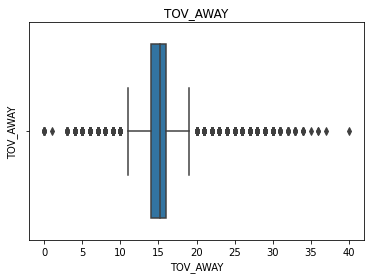

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


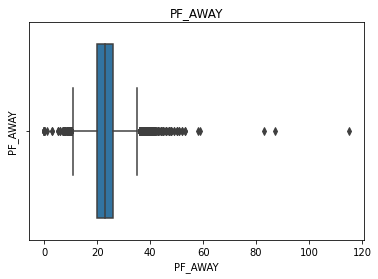

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


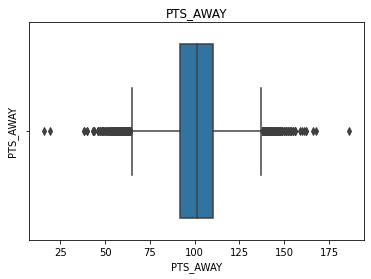

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


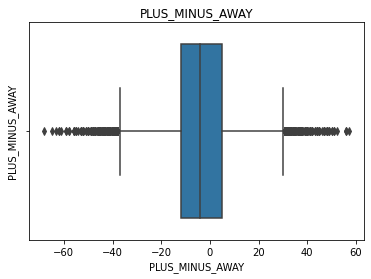

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


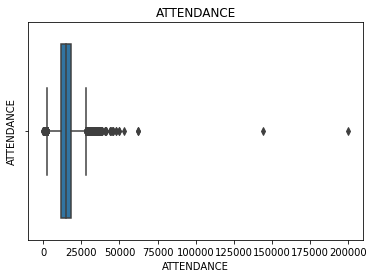

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


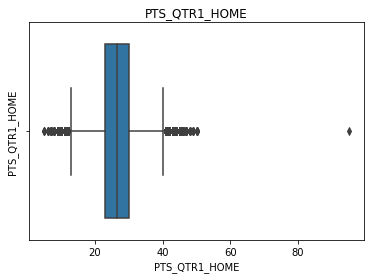

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


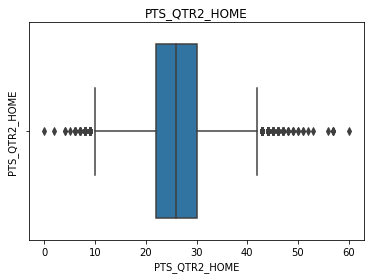

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


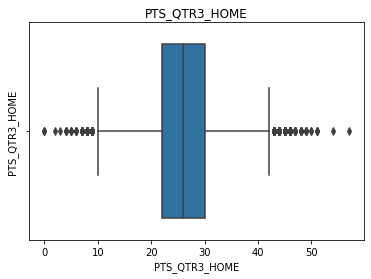

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


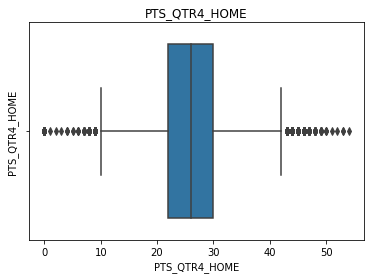

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


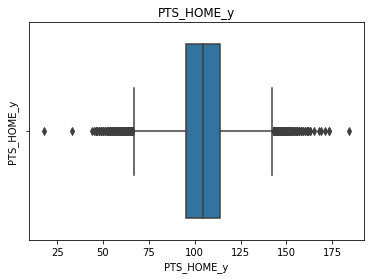

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


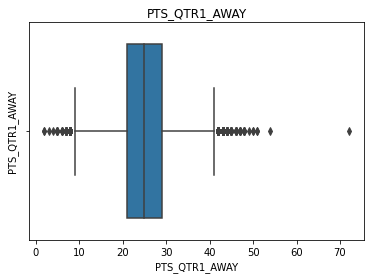

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


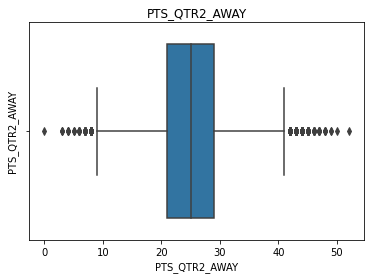

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


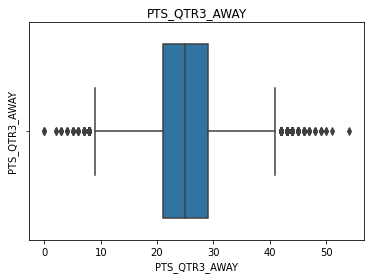

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


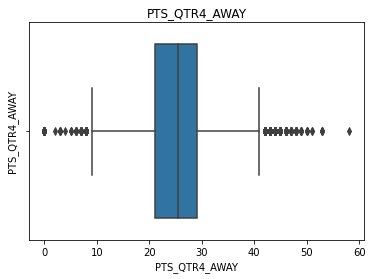

In [25]:
plot_outliers(game_copy,numeric_col)

There are outliers in all the columns, creating a function to identify the outlier vlaue and replacing it with 2.9 std. most of the numeric cols represent the scores of the team, so outlier might respresnt an exceptionally well played match or poor match, based on the outlier in upper bound or lower bound replacing the outliers with +/- 0.75 std

In [26]:
low_outliers = []
up_outliers = []
def detect_outliers(data):
    """ This function gets the particular column as input and checks for outliers using IQR method"""
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound): #Using IQR method to detect outliers
            low_outliers.append(i)
        elif (i>upr_bound):
            up_outliers.append(i)
    return low_outliers,up_outliers

def replace_outliers(low_outliers,up_outliers,data):
    std = np.std(data)
    for i in range(len(data)):
        if data[i] in low_outliers:
            data[i] = data[i] + 0.75 * std
        elif data[i] in up_outliers:
            data[i] = data[i] - 0.75 * std 
        else:
            continue
    return data
  


In [ ]:
# this takes too long to replace the column hence skipping this step and handling outliers by simply droping the values
iteration = 1
for col in numeric_col:
    iteration += 1
    print(iteration)
    low_outliers,up_outliers = detect_outliers(game_copy[col])
    game_copy[col] = replace_outliers(low_outliers,up_outliers,game_copy[col])

2


C:\Users\591664\.conda\envs\mlflow\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\591664\.conda\envs\mlflow\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


*the above step deals the outlier by replacing it with different value, since it takes too long to execute everytime I have dropped the outliers in the steo below

In [27]:
import sys

In [131]:
game_copy.loc[2].at['FGM_HOME']

21.0

In [148]:
game_copy[game_copy['FGM_HOME'] == 21.0].index[0]

2

In [183]:
def detect_and_drop_outliers(data,cols):
            index_of_outliers=[]
            print(cols)
            data_mean, data_std = np.mean(data[cols]), np.std(data[cols])
            # identify outliers
            cut_off = data_std * 3
            lower, upper = data_mean - cut_off, data_mean + cut_off
            
            outliers = [x for x in data[cols] if x < lower or x > upper]
            for i in range(0,len(data[cols])):
                value = data.loc[i].at[cols]
                if value in outliers:          
                    index_of_outliers.append(data[data[cols] == value].index[0])
            index_set = set(index_of_outliers)
            index_list=list(index_set)
            data.drop(index_list,axis=0,inplace=True)
            data.reset_index(drop=True,inplace=True)
            
            #outliers_removed = [x for x in data if x > lower and x < upper]

            return data


In [175]:
#game_copy_before = game_copy

In [151]:
#game_copy=game_copy_before

In [139]:
game_copy.head(5)

,TEAM_ABBREVIATION_HOME,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,...,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_HOME_y,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY
0,HUS,L,25.0,83.900305,0.467941,5.0,15.0,0.34658,16.0,29.000000,...,14543.309359,26.472019,26.036534,26.067362,25.98503,66.0,25.215656,25.027192,25.153435,25.506627
1,BOM,W,20.0,59.000000,0.339000,5.0,15.0,0.34658,16.0,27.359153,...,14543.309359,16.000000,16.000000,18.000000,6.00000,56.0,5.000000,15.000000,17.000000,14.000000
2,CHS,W,21.0,83.900305,0.467941,5.0,15.0,0.34658,21.0,27.359153,...,14543.309359,26.472019,26.036534,26.067362,25.98503,63.0,25.215656,25.027192,25.153435,25.506627
3,PRO,W,21.0,83.900305,0.467941,5.0,15.0,0.34658,17.0,27.359153,...,14543.309359,26.472019,12.000000,18.000000,15.00000,59.0,10.000000,16.000000,14.000000,13.000000
4,DEF,L,10.0,83.900305,0.467941,5.0,15.0,0.34658,13.0,27.359153,...,14543.309359,9.000000,10.000000,10.000000,4.00000,33.0,21.000000,4.000000,12.000000,13.000000


In [184]:
#FGA_HOME = detect_and_drop_outliers(game_copy,'FGA_HOME')

FGA_HOME


In [185]:
#FGA_HOME.head()

,TEAM_ABBREVIATION_HOME,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,...,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_HOME_y,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY
0,HUS,L,25.0,83.900305,0.467941,5.0,15.0,0.34658,16.0,29.000000,...,14543.309359,26.472019,26.036534,26.067362,25.98503,66.0,25.215656,25.027192,25.153435,25.506627
1,CHS,W,21.0,83.900305,0.467941,5.0,15.0,0.34658,21.0,27.359153,...,14543.309359,26.472019,26.036534,26.067362,25.98503,63.0,25.215656,25.027192,25.153435,25.506627
2,PRO,W,21.0,83.900305,0.467941,5.0,15.0,0.34658,17.0,27.359153,...,14543.309359,26.472019,12.000000,18.000000,15.00000,59.0,10.000000,16.000000,14.000000,13.000000
3,DEF,L,10.0,83.900305,0.467941,5.0,15.0,0.34658,13.0,27.359153,...,14543.309359,9.000000,10.000000,10.000000,4.00000,33.0,21.000000,4.000000,12.000000,13.000000
4,CLR,W,24.0,83.900305,0.467941,5.0,15.0,0.34658,23.0,27.359153,...,14543.309359,26.472019,26.036534,26.067362,25.98503,71.0,25.215656,25.027192,25.153435,25.506627


In [186]:
for col in numeric_col:
    game_copy= detect_and_drop_outliers(game_copy,col)

FGM_HOME
FGA_HOME
FG_PCT_HOME
FG3M_HOME
FG3A_HOME
FG3_PCT_HOME
FTM_HOME
FTA_HOME
FT_PCT_HOME
OREB_HOME
DREB_HOME
REB_HOME
AST_HOME
STL_HOME
BLK_HOME
TOV_HOME
PF_HOME
PTS_HOME
PLUS_MINUS_HOME
FGM_AWAY
FGA_AWAY
FG_PCT_AWAY
FG3M_AWAY
FG3A_AWAY
FG3_PCT_AWAY
FTM_AWAY
FTA_AWAY
FT_PCT_AWAY
OREB_AWAY
DREB_AWAY
REB_AWAY
AST_AWAY
STL_AWAY
BLK_AWAY
TOV_AWAY
PF_AWAY
PTS_AWAY
PLUS_MINUS_AWAY
ATTENDANCE
PTS_QTR1_HOME
PTS_QTR2_HOME
PTS_QTR3_HOME
PTS_QTR4_HOME
PTS_HOME_y
PTS_QTR1_AWAY
PTS_QTR2_AWAY
PTS_QTR3_AWAY
PTS_QTR4_AWAY


We have removed outliers from all the numeric columns based on 3*std    method

In [187]:
game_copy.shape

(61083, 51)

In [ ]:
game_copy.head()

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


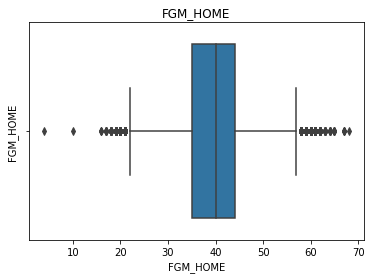

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


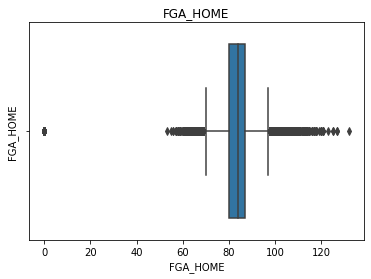

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


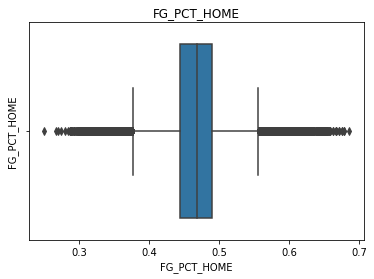

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


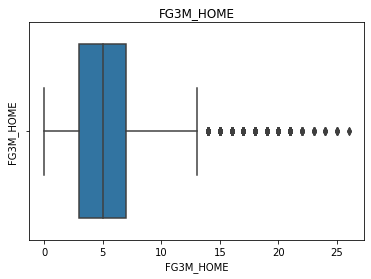

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


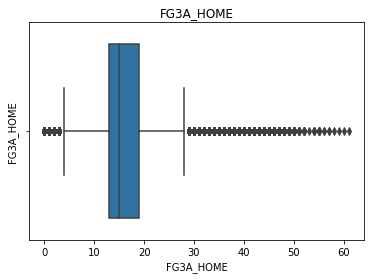

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


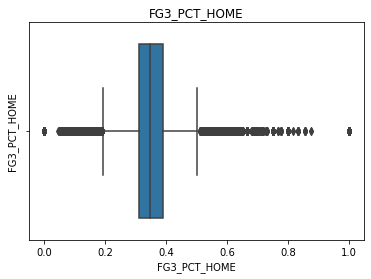

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


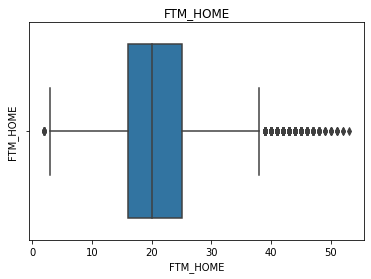

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


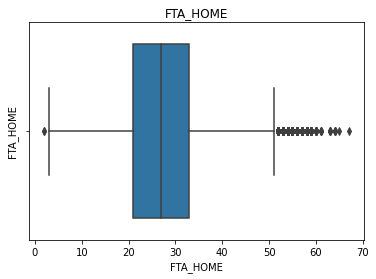

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


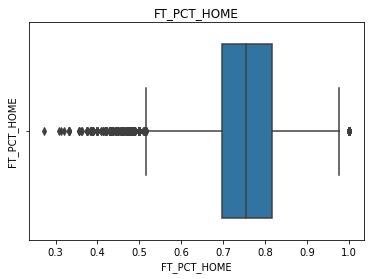

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


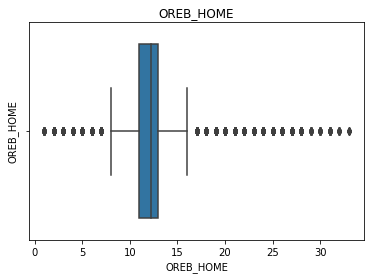

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


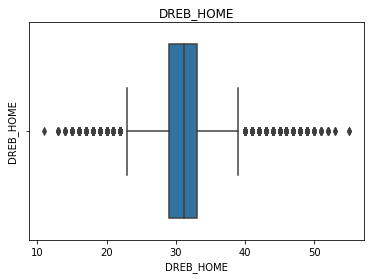

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


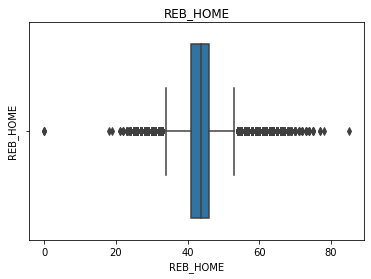

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


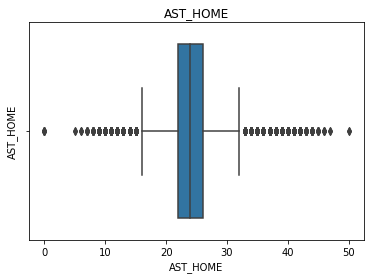

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


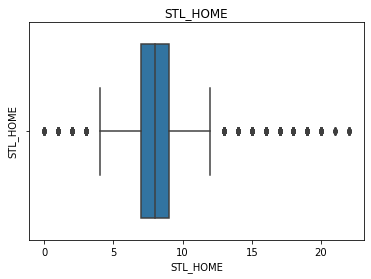

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


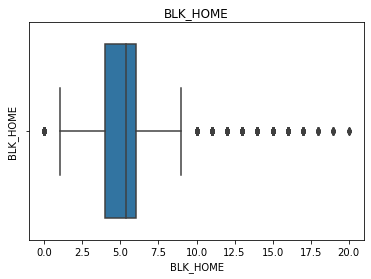

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


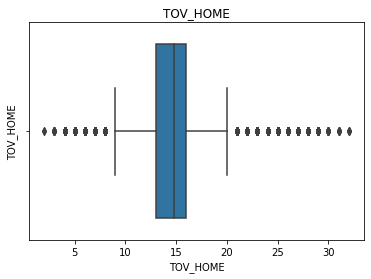

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


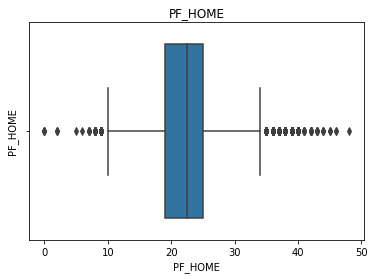

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


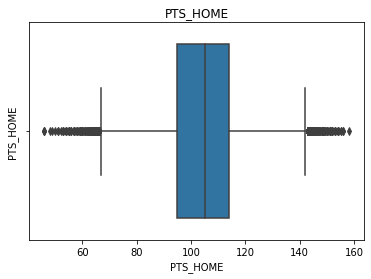

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


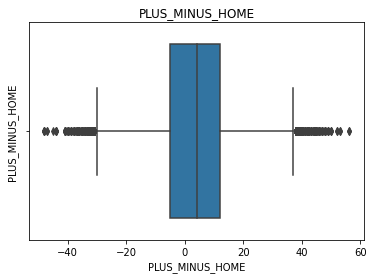

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


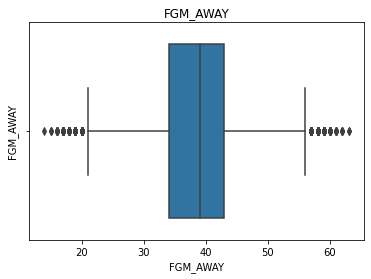

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


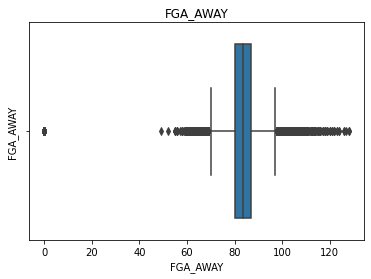

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


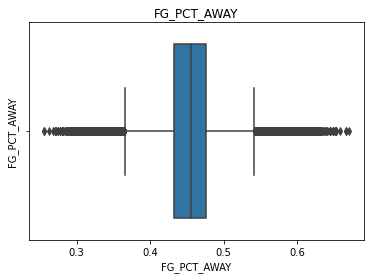

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


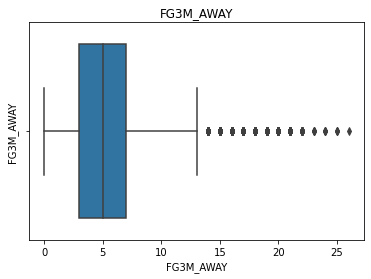

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


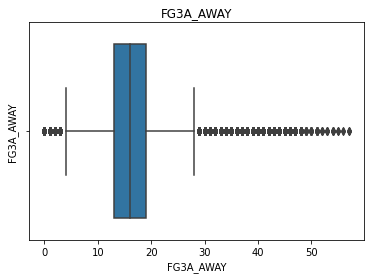

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


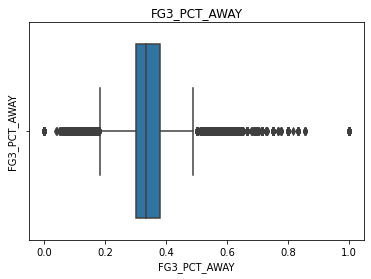

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


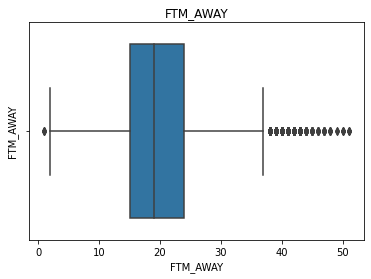

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


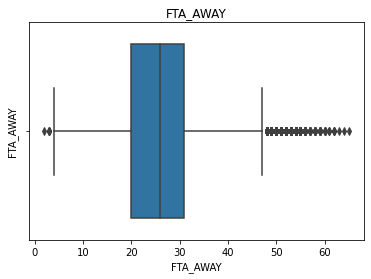

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


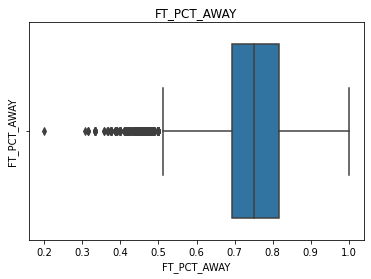

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


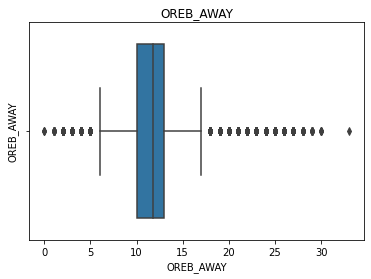

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


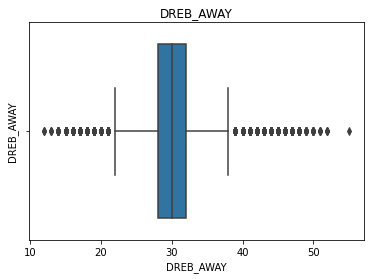

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


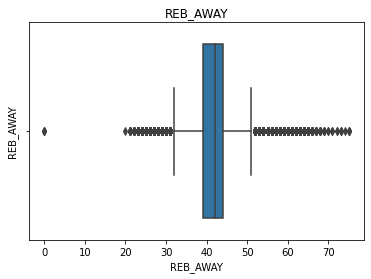

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


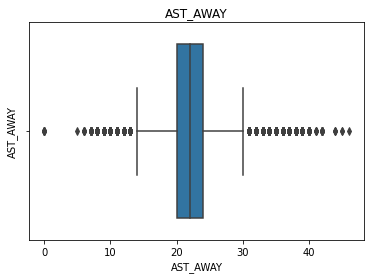

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


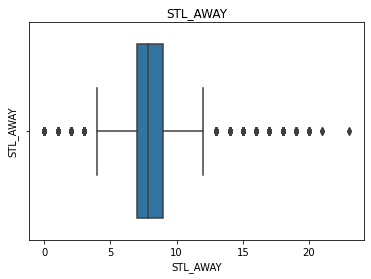

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


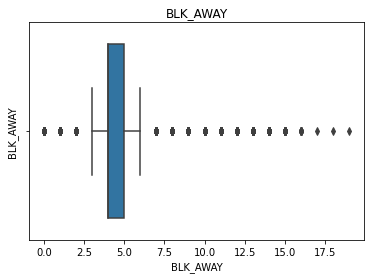

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


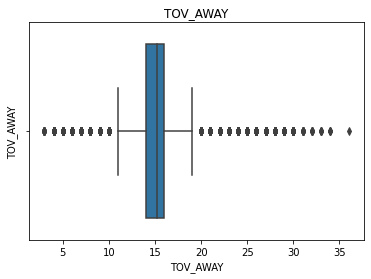

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


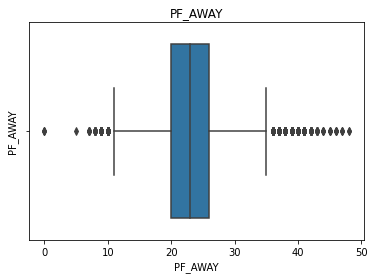

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


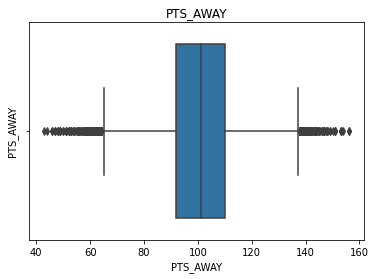

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


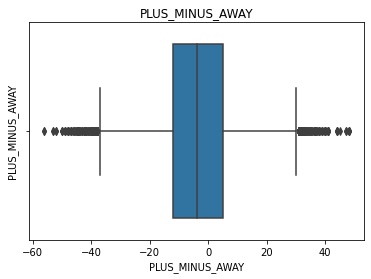

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


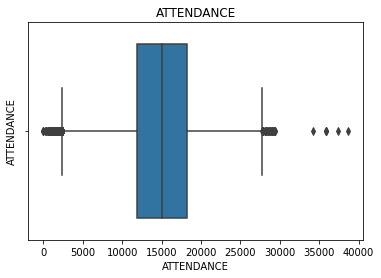

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


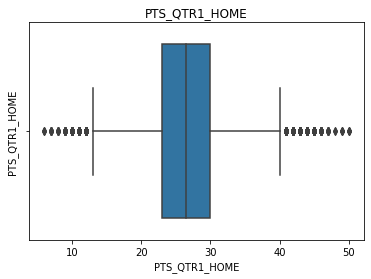

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


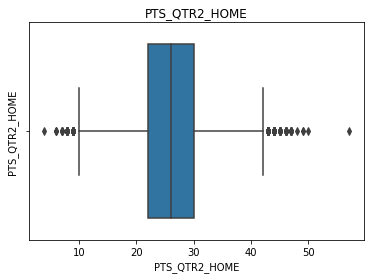

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


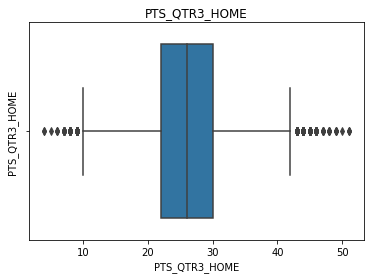

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


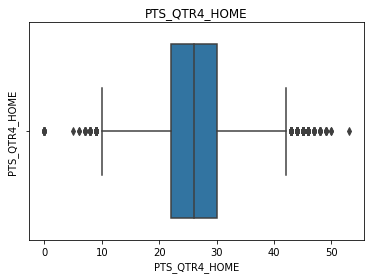

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


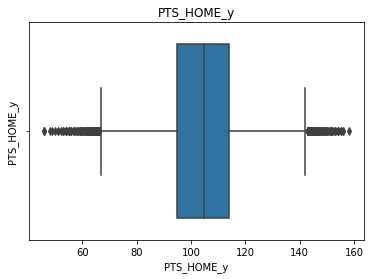

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


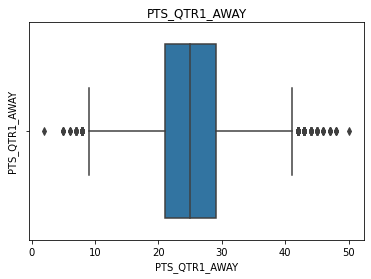

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


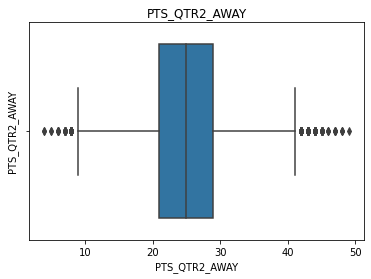

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


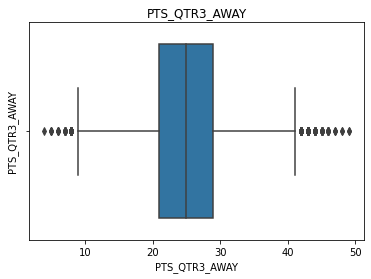

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


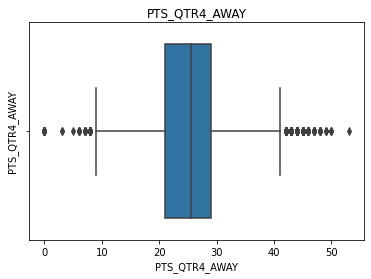

In [188]:
plot_outliers(game_copy,numeric_col)

We could see that outliers have been cleared in most of the columns. still outliers are visible in the plot, these are outliers after removing the outliers from the original dataset, so we let it remain

Checking for MUlticollinearity in the models:

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [190]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [191]:
vif_num = calc_vif(game_copy[numeric_col])
vif_num

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,FGM_HOME,1.883818e+04
1,FGA_HOME,7.911192e+02
2,FG_PCT_HOME,4.279718e+02
3,FG3M_HOME,1.422163e+02
4,FG3A_HOME,3.903999e+01
5,FG3_PCT_HOME,1.686911e+01
6,FTM_HOME,1.528310e+03
7,FTA_HOME,1.702358e+02
8,FT_PCT_HOME,1.751072e+02
9,OREB_HOME,7.786424e+01


In [192]:
game_copy.shape # making sure that number or rows is preserved

(61083, 51)

we could see most of the columns are multicollinear, I am dropping the columns with exponential power > 1

In [193]:
drop_cols_new = ['FGA_HOME','FG_PCT_HOME','FG3A_HOME','FG3_PCT_HOME','FGA_AWAY','FG_PCT_AWAY','PTS_HOME_y','FGM_HOME','FG3M_HOME','FTM_HOME','OREB_HOME','DREB_HOME','REB_HOME','PTS_HOME',
            'PLUS_MINUS_HOME','FGM_AWAY','FG3M_AWAY','FTM_AWAY','OREB_AWAY','DREB_AWAY','REB_AWAY','PTS_AWAY','PLUS_MINUS_AWAY',
                'FT_PCT_HOME','PF_HOME','FT_PCT_AWAY','PF_AWAY']

In [194]:
numeric_new = [item for item in numeric_col if item not in drop_cols_new]
len(numeric_new)

21

In [195]:
game_copy_out = game_copy

In [196]:
game_copy_out.head()

,TEAM_ABBREVIATION_HOME,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,...,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_HOME_y,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY
0,HUS,L,25.0,83.900305,0.467941,5.0,15.0,0.34658,16.0,29.000000,...,14543.309359,26.472019,26.036534,26.067362,25.98503,66.0,25.215656,25.027192,25.153435,25.506627
1,CLR,W,24.0,83.900305,0.467941,5.0,15.0,0.34658,23.0,27.359153,...,14543.309359,26.472019,26.036534,26.067362,25.98503,71.0,25.215656,25.027192,25.153435,25.506627
2,PHW,W,28.0,83.900305,0.467941,5.0,15.0,0.34658,25.0,39.000000,...,14543.309359,26.472019,26.036534,26.067362,25.98503,81.0,25.215656,25.027192,25.153435,25.506627
3,PRO,W,31.0,83.900305,0.467941,5.0,15.0,0.34658,11.0,27.359153,...,14543.309359,26.472019,26.036534,26.067362,25.98503,73.0,25.215656,25.027192,25.153435,25.506627
4,PRO,W,22.0,83.900305,0.467941,5.0,15.0,0.34658,32.0,27.359153,...,14543.309359,26.472019,26.036534,26.067362,25.98503,76.0,25.215656,25.027192,25.153435,25.506627


In [197]:
game_copy_out.drop(drop_cols_new,axis=1,inplace=True)

In [198]:
game_copy_out.head()

,TEAM_ABBREVIATION_HOME,WL_HOME,FTA_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,TEAM_ABBREVIATION_AWAY,FG3A_AWAY,FG3_PCT_AWAY,...,TOV_AWAY,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY
0,HUS,L,29.000000,23.946498,8.00772,5.351151,14.779606,NYK,16.0,0.333,...,15.192521,14543.309359,26.472019,26.036534,26.067362,25.98503,25.215656,25.027192,25.153435,25.506627
1,CLR,W,27.359153,23.946498,8.00772,5.351151,14.779606,HUS,16.0,0.333,...,15.192521,14543.309359,26.472019,26.036534,26.067362,25.98503,25.215656,25.027192,25.153435,25.506627
2,PHW,W,39.000000,23.946498,8.00772,5.351151,14.779606,PIT,16.0,0.333,...,15.192521,14543.309359,26.472019,26.036534,26.067362,25.98503,25.215656,25.027192,25.153435,25.506627
3,PRO,W,27.359153,23.946498,8.00772,5.351151,14.779606,CHS,16.0,0.333,...,15.192521,14543.309359,26.472019,26.036534,26.067362,25.98503,25.215656,25.027192,25.153435,25.506627
4,PRO,W,27.359153,23.946498,8.00772,5.351151,14.779606,PIT,16.0,0.333,...,15.192521,14543.309359,26.472019,26.036534,26.067362,25.98503,25.215656,25.027192,25.153435,25.506627


In [199]:
vif_num = calc_vif(game_copy_out[numeric_new])
vif_num

,variables,VIF
0,FTA_HOME,14.947642
1,AST_HOME,41.588093
2,STL_HOME,23.932751
3,BLK_HOME,6.726662
4,TOV_HOME,44.434937
5,FG3A_AWAY,6.241578
6,FG3_PCT_AWAY,9.448893
7,FTA_AWAY,15.179797
8,AST_AWAY,37.502482
9,STL_AWAY,24.308641


 we have removed those columns that had very high VIF, though vif >5, i am keeping the cols

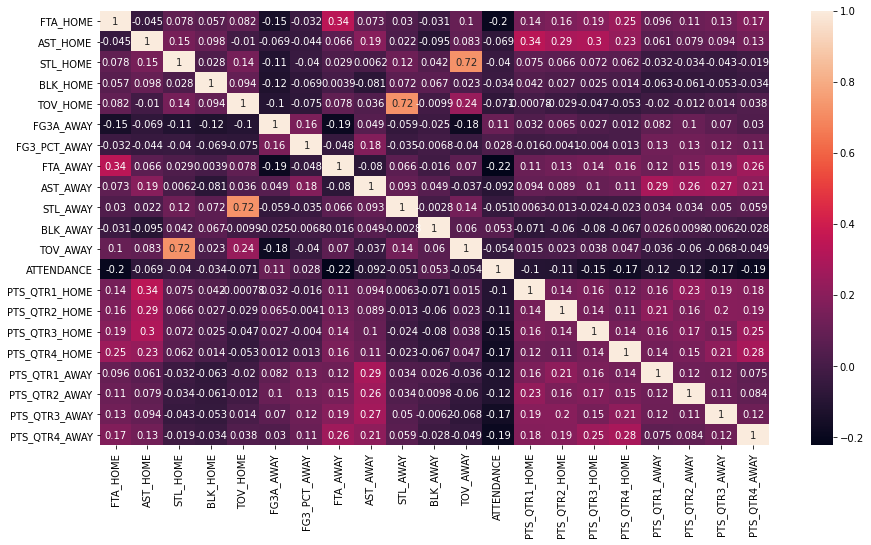

In [200]:
corr = game_copy_out.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.show()

from the plot we could see that STL_HOME,TOV_AWAY and STL_AWAY,TOV_HOME are correlated so we shall drop one of those columns,

In [201]:
game_copy_out.drop(['TOV_HOME','TOV_AWAY'],axis=1,inplace=True)

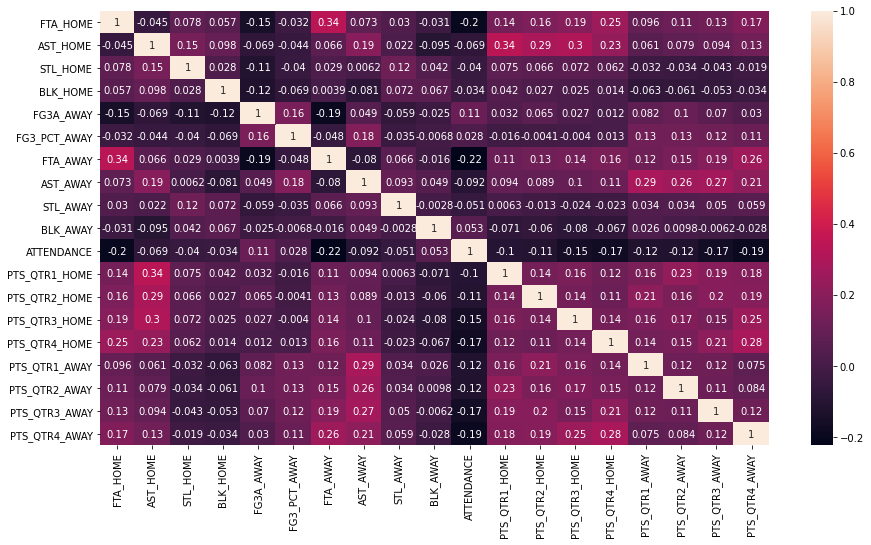

In [202]:
corr = game_copy_out.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.show()

In [68]:
ls = ['TOV_HOME','TOV_AWAY']

In [203]:
numeric_new = [item for item in numeric_new if item not in ls ]

In [204]:
categorical_col

['TEAM_ABBREVIATION_HOME', 'WL_HOME', 'TEAM_ABBREVIATION_AWAY']

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


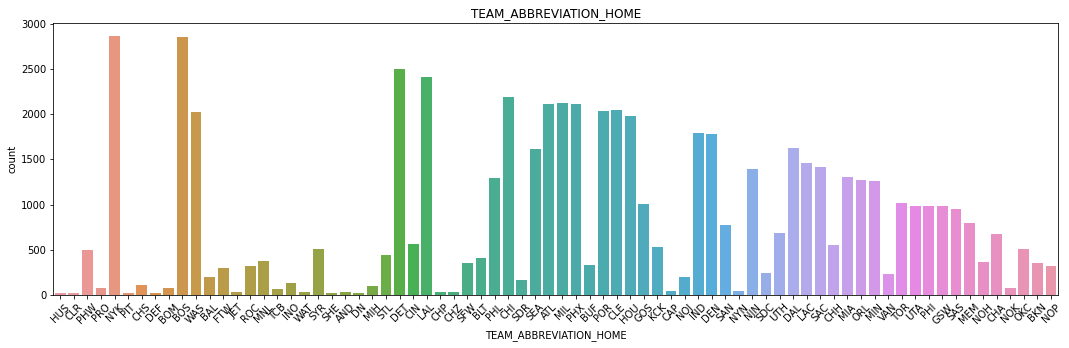

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


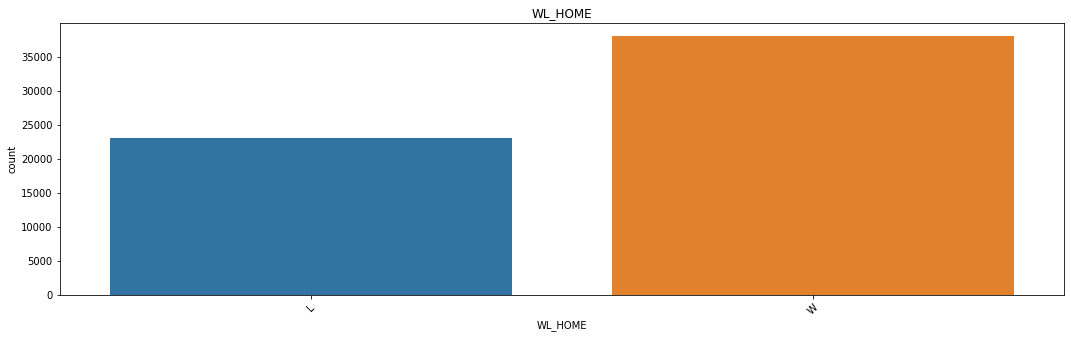

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


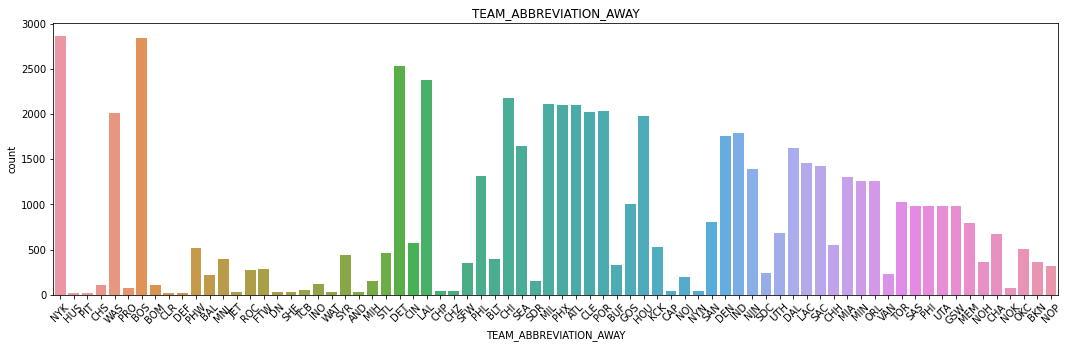

In [206]:
for col in categorical_col:
    plt.figure(figsize=(18,5))
    sns.countplot(game_copy[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

Here WL_HOME is our target variable, there is some imbalance in the class, resamping to handle the imbalance

In [207]:
from sklearn.utils import resample

In [208]:
game_copy_out["WL_HOME"].unique()

array(['L', 'W', nan], dtype=object)

In [209]:
majority_class = game_copy[(game_copy['WL_HOME']=='W')] 
minority_class = game_copy[(game_copy['WL_HOME']=='L')] 
minority_class_upsampled = resample(minority_class,replace=True,n_samples= len(majority_class),random_state=42)
game_copy_upsampled = pd.concat([minority_class_upsampled, majority_class])

Visulaizin the column after upsampling

C:\Users\591664\.conda\envs\mlflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


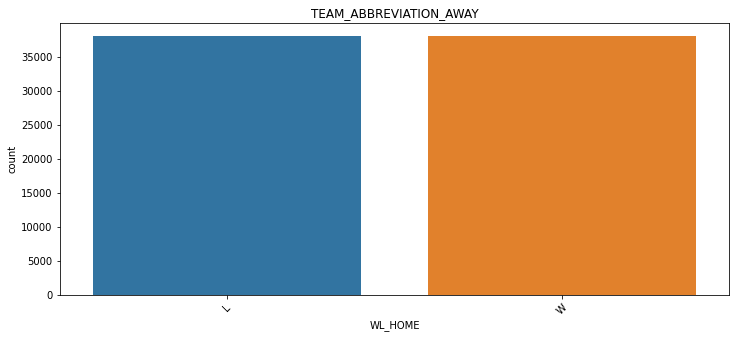

In [210]:
plt.figure(figsize=(12,5))
sns.countplot(game_copy_upsampled['WL_HOME'])
plt.title(col)
plt.xticks(rotation=45)
plt.show()

Creating feature and target variables

In [211]:
X = game_copy_upsampled.drop('WL_HOME',axis=1)
y=game_copy_upsampled['WL_HOME']
print(X.shape,y.shape)

(76032, 21) (76032,)


In [212]:
X_dummy = pd.get_dummies(X[['TEAM_ABBREVIATION_HOME','TEAM_ABBREVIATION_AWAY']])

In [213]:
X.drop(['TEAM_ABBREVIATION_HOME','TEAM_ABBREVIATION_AWAY'],axis=1,inplace=True)

In [214]:
X_trans = pd.concat([X,X_dummy],axis=1)

In [215]:
X.shape,X_dummy.shape,X_trans.shape

((76032, 19), (76032, 148), (76032, 167))

In [216]:
X_train,X_test,y_train,y_test = train_test_split(X_trans,y,test_size=0.15,stratify=y,random_state=5,)

In [217]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train[numeric_new])
X_test_std = std.transform(X_test[numeric_new])
#X_train_std=pd.DataFrame(X_train_std)
#X_test_std=pd.DataFrame(X_test_std)

In [218]:
X_train_std.shape,X_test_std.shape

((64627, 19), (11405, 19))

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

LogisticRegression()

In [221]:
from sklearn.metrics import f1_score,accuracy_score

In [222]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [223]:
y_train_pred[:5],y_test_pred[:3]

(array(['L', 'L', 'L', 'W', 'L'], dtype=object),
 array(['L', 'W', 'L'], dtype=object))

In [224]:
X_Train_f1 = f1_score(y_true=y_train,y_pred=y_train_pred, pos_label="W")
X_test_f1 = f1_score(y_true=y_test,y_pred=y_test_pred,pos_label="W")
X_train_acc = accuracy_score(y_true=y_train,y_pred=y_train_pred)
X_test_acc = accuracy_score(y_true=y_test,y_pred=y_test_pred)
                             

In [225]:
print(f'f1_score for training_data is: {X_Train_f1}')
print(f'Accuracy score for X_train is: {X_train_acc}')
print(f'f1_score for test data is: {X_test_f1}')
print(f'Accuracy score for test is: {X_test_acc}')

f1_score for training_data is: 0.9681091617933723
Accuracy score for X_train is: 0.9683568787039473
f1_score for test data is: 0.9711156258281071
Accuracy score for test is: 0.9713283647523017


Model is working very well on both train and test set.

In [226]:
import pickle

In [227]:
pickle.dump(lr, open("LogisticRegressionmodel.pkl", 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open("LogisticRegressionmodel.pkl", 'rb'))
result = loaded_model.score(X_test_std, y_test)
print(result)

0.9713283647523017
